In [ ]:
!apt install libtesseract-dev
!apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libleptonica-dev
The following NEW packages will be installed:
  libleptonica-dev libtesseract-dev
0 upgraded, 2 newly installed, 0 to remove and 10 not upgraded.
Need to get 2,755 kB of archives.
After this operation, 13.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libleptonica-dev amd64 1.75.3-3 [1,308 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libtesseract-dev amd64 4.00~git2288-10f4998a-2 [1,447 kB]
Fetched 2,755 kB in 1s (2,227 kB/s)
Selecting previously unselected package libleptonica-dev.
(Reading database ... 146442 files and directories currently installed.)
Preparing to unpack .../libleptonica-dev_1.75.3-3_amd64.deb ...
Unpacking libleptonica-dev (1.75.3-3) ...
Selecting previously unselected package libtesseract-dev.
Preparing to unpack .../libte

In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=5282d19ca66f77c2f3be5259e900288b9b06aeaa09c79a3feaab2636e5a6317e
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [ ]:
import cv2
import imutils
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread('/content/car0.jpeg',cv2.IMREAD_COLOR)
img = cv2.resize(img, (600,400) )

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
gray = cv2.bilateralFilter(gray, 13, 15, 15)

In [ ]:
edged = cv2.Canny(gray, 30, 200) 
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = 0

In [ ]:
for c in contours:
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is 0:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)

No contour detected


In [ ]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

error: ignored

In [ ]:
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+2, topy:bottomy+2]

programming_fever's License Plate Recognition

Detected license plate Number is: ZG *3254-D|



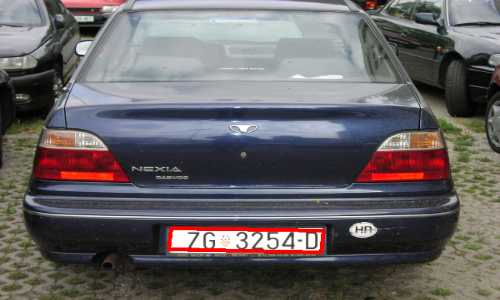

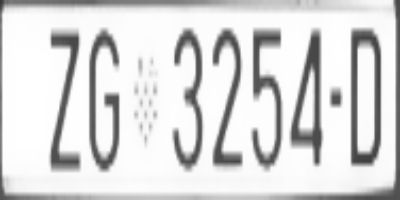

In [ ]:
for i in range(2):
  text = pytesseract.image_to_string(Cropped, config='--psm 10')
print("programming_fever's License Plate Recognition\n")
print("Detected license plate Number is:",text)


img = cv2.resize(img,(500,300))
Cropped = cv2.resize(Cropped,(400,200))
cv2_imshow(img)
cv2_imshow(Cropped)

In [ ]:

count=0
for i in text:       # i holds each character in String s for every iteration of loop
  
  if(i.isalpha()):
    count=count+1
  else:
    break   # Increment Count by 1
print("Number of Characters representing the state =",count)

Number of Characters representing the state = 3
